In [1]:
import tensorflow as tf
import os
import pandas as pd
import pickle
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [2]:
tf.__version__

'2.3.1'

In [3]:
print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Preprocessing

In [4]:
labels = pd.read_csv('label_names.csv')

In [ ]:
# labels = pd.read_csv('Proj2_data/data1/label_names.csv')

In [ ]:
with open('Proj2_data/data1/test.pickle', 'rb') as pickle_file:
    test = pickle.load(pickle_file)
with open('Proj2_data/data1/train.pickle', 'rb') as pickle_file:
    train = pickle.load(pickle_file)
with open('Proj2_data/data1/valid.pickle', 'rb') as pickle_file:
    validation = pickle.load(pickle_file)

Plot single image from train dataset

31 [ 6  5 57 51] [63 56]


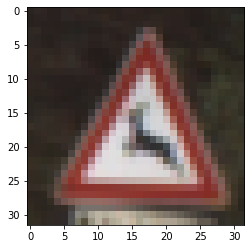

In [ ]:
# i = 500
# img = train['features'][i]
# imgplot = plt.imshow(img)
# print(train['labels'][i], train['coords'][i], train['sizes'][i])

Plot a images from all categories and with number of images per each category

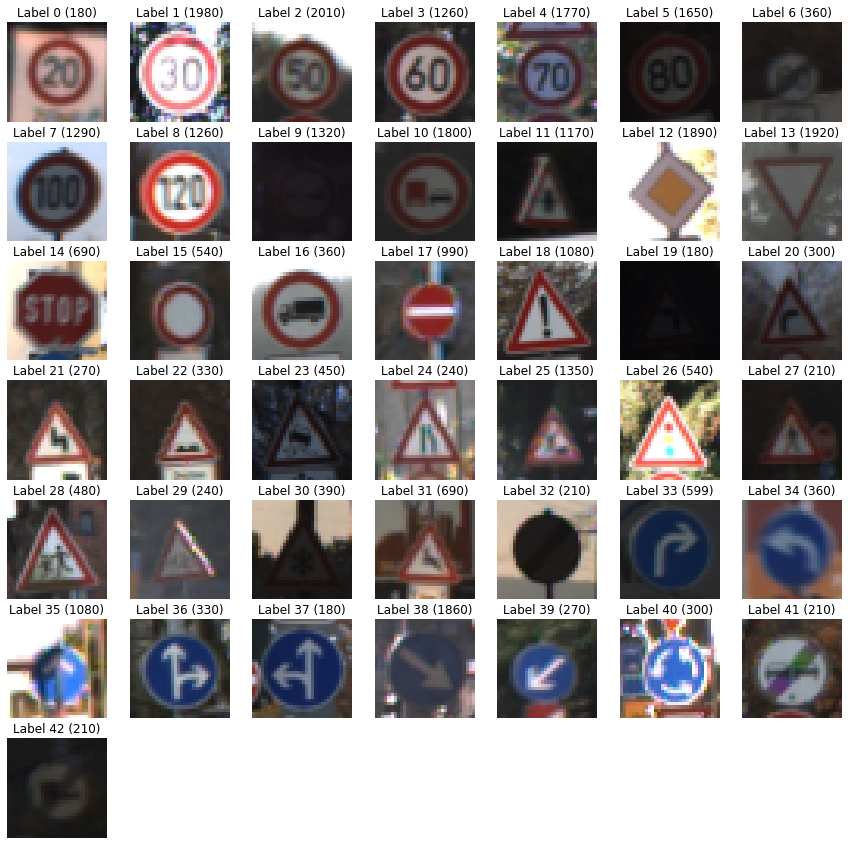

In [ ]:
# def display_images_and_labels(train, labels):
#     """Display the first image of each label."""
#     unique_labels = set(labels)
#     plt.figure(figsize=(15, 15))
#     i = 1
#     n_labels = []
#     for label in unique_labels:
      
#         # Pick the first image for each label. 
#         image = train[np.random.choice(np.where(labels==label)[0])]
#         plt.subplot(7, 7, i)  # A grid of 8 rows x 8 columns
#         plt.axis('off')
#         plt.title("Label {0} ({1})".format(label, np.count_nonzero(labels==label)))
#         n_labels.append([label, np.count_nonzero(labels==label)])
#         i += 1
#         _ = plt.imshow(image)
#     plt.show()
    
#     return(n_labels)


# n_lables = display_images_and_labels(train['features'], train['labels'])

Bar chart of samples per category

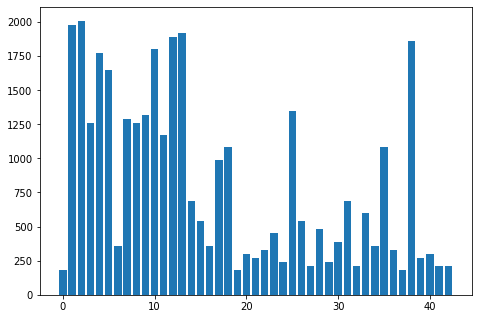

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# import matplotlib.pyplot as plt

# numbers = [i[1] for i in n_lables]
# label_number = [i[0] for i in n_lables]

# fig = plt.figure()
# plt.figure(figsize=(15, 15))
# ax = fig.add_axes([0,0,1,1])
# ax.bar(label_number,numbers)
# plt.show()

In [ ]:
# !! data is unbalanced but it's because of unbalance augmentation implemented on the images.
# for exmaple 30 images of class 0 on train dataset was the same picture but augmented.
# in following experiments, i hadn't qualized number of images in different classes nor augmented images any further 
# since they are heavily augmented already. results were clearly biased towards classes with higher populations (no surprise!), but 
# since it hadn't reduced the accuracy on the test set (highest was 96% on the last version of the network), i continued with this biased dataset.

Display some images form a specified category

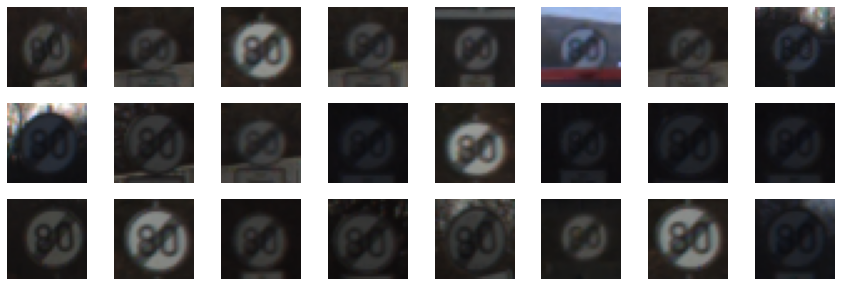

In [ ]:
# def display_label_images(images, label):
#     """Display images of a specific label."""
#     limit = 24  # show a max of 24 images
#     plt.figure(figsize=(15, 5))
#     i = 1

#     start = np.where(train['labels']==label)[0][0]
#     end = start + np.count_nonzero(train['labels']==label)
#     rand = np.random.choice(len(images[start:end]), limit)
#     for j in rand:
#         image = images[start:end][j]
#         plt.subplot(3, 8, i)  # 3 rows, 8 per row
#         plt.axis('off')
#         i += 1
#         plt.imshow(image)
#     plt.show()

# display_label_images(train['features'], 6)

Functions for two assumptions of input data,


*   one only crops input to its frame coords
*   and the other also computes its equalized hist


In [ ]:
# i = 0
# img_size = 220

# def raw2Hist(data, index, img_size):
#     x1, y1, x2, y2 = data['coords'][index][0], data['coords'][index][1], data['coords'][index][2], data['coords'][index][3]
#     img = data['features'][index]
#     img_c = data['features'][index][data['coords'][index][0]:data['coords'][index][2], data['coords'][index][1]:data['coords'][index][3], :]
#     img_c_r = cv2.resize(img_c, (img_size, img_size), img_size/x2-x1, img_size/y2-y1)
#     img_c_r_g = cv2.cvtColor(img_c_r, cv2.COLOR_BGR2GRAY)
#     img_c_r_g_h = cv2.equalizeHist(img_c_r_g)
#     return img_c_r_g_h

# def raw2Cropped(data, index, img_size):
#     x1, y1, x2, y2 = data['coords'][index][0], data['coords'][index][1], data['coords'][index][2], data['coords'][index][3]
#     img = data['features'][index]
#     img_c = data['features'][index][data['coords'][index][0]:data['coords'][index][2], data['coords'][index][1]:data['coords'][index][3], :]
#     img_c_r = cv2.resize(img_c, (img_size, img_size), img_size/x2-x1, img_size/y2-y1)
#     # img_c_r_g = cv2.cvtColor(img_c_r, cv2.COLOR_BGR2GRAY)
#     # img_c_r_g_h = cv2.equalizeHist(img_c_r_g)
#     return img_c_r
# plt.subplot(2,3,1)
# plt.imshow(img)
# plt.subplot(2,3,2)
# plt.imshow(img_c)
# plt.subplot(2,3,3)
# plt.imshow(img_c_r)
# plt.subplot(2,3,4)
# plt.imshow(img_c_r_g, cmap="gray", vmin=0, vmax=255)
# plt.subplot(2,3,5)
# plt.imshow(img_c_r_g_h, cmap="gray", vmin=0, vmax=255)
# print(train['labels'][i], train['coords'][i], train['sizes'][i])
# plt.imshow(raw2Cropped(500, 150), cmap="gray", vmin=0, vmax=255)

Applying each of two mentioned functions on input and saving them

In [ ]:
# def pickle2Dir(data, name, img_size):
#     from PIL import Image
#     for i in set(data['labels']):

#         idx = np.where(data['labels']==i)[0]
#         print(len(idx), end='  ')
#         counter = 0
#         os.mkdir(f'd1/hist/{name}/class_{i}')
#         for j in idx:
#             img = raw2Hist(data, j, img_size)
#             Image.fromarray(img).save(f'd1/hist/{name}/class_{i}/img_{counter}.jpg')
#             counter += 1


# pickle2Dir(validation,'valid', 150)

30  240  240  150  210  210  60  150  150  150  210  150  210  240  90  90  60  120  120  30  60  60  60  60  30  150  60  30  60  30  60  90  30  90  60  120  60  30  210  30  60  30  30  

In [ ]:
def file_len(dir):
    out = []
    for subdir, dirs, files in os.walk(dir):
        for filename in files:
            filepath = subdir + os.sep + filename

            if filepath.endswith(".jpg") or filepath.endswith(".png"):
                out.append(filepath)
    return(len(out))

# Cropped images - Xception - 75,84%

import the files with TF



In [ ]:
import os

train_dir = os.getcwd()+'/d1/train'
test_dir = os.getcwd()+'/d1/test'
valid_dir = os.getcwd()+'/d1/valid'
img_height, img_width = 150, 150
batch_size = 32

# Assert the existence of files in their directory!
assert len(file_len(train_dir)) == 34799
assert len(file_len(valid_dir)) == 4410
assert len(file_len(test_dir)) == 12630

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Display some samples from train dataset loaded by tf.

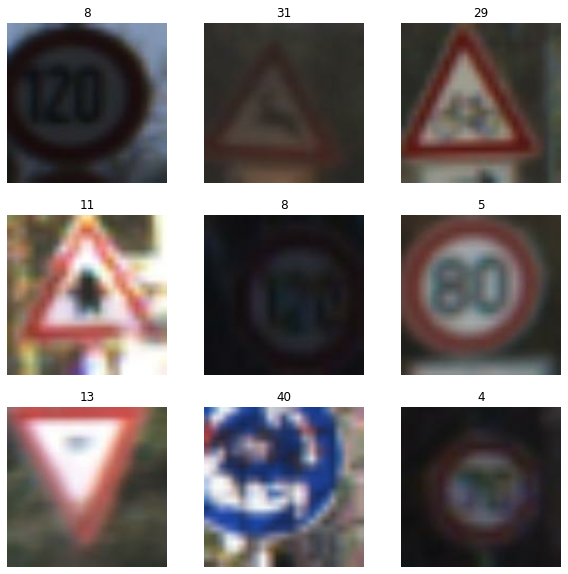

In [ ]:
# import matplotlib.pyplot as plt

# class_names = train_ds.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
# it'll blows the RAM!! but improves performance, (io wised)

# train_ds = train_ds.cache().prefetch(buffer_size=10)
# valid_ds = valid_ds.cache().prefetch(buffer_size=10)
# test_ds = test_ds.cache().prefetch(buffer_size=10)

import xception and build the model

In [ ]:
from tensorflow import keras

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
# x = inputs  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(inputs)
norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(43)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                88107     
Total params: 20,949,594
Trainable params: 88,107
Non-trainable params: 20,861,487
_____________________________________

In [ ]:
# base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


epochs = 10
model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=valid_ds, 
    batch_size=32,)

Epoch 1/10
1088/1088 [==============================] - 131s 120ms/step - loss: 0.9310 - accuracy: 0.7405 - val_loss: 0.9412 - val_accuracy: 0.7029
Epoch 2/10
1088/1088 [==============================] - 126s 116ms/step - loss: 0.4582 - accuracy: 0.8700 - val_loss: 0.8676 - val_accuracy: 0.7227
Epoch 3/10
1088/1088 [==============================] - 126s 116ms/step - loss: 0.3567 - accuracy: 0.8972 - val_loss: 0.8539 - val_accuracy: 0.7263
Epoch 4/10
1088/1088 [==============================] - 125s 115ms/step - loss: 0.3065 - accuracy: 0.9090 - val_loss: 0.8692 - val_accuracy: 0.7290
Epoch 5/10
1088/1088 [==============================] - 123s 113ms/step - loss: 0.2700 - accuracy: 0.9190 - val_loss: 0.8731 - val_accuracy: 0.7376
Epoch 6/10
1088/1088 [==============================] - 124s 114ms/step - loss: 0.2466 - accuracy: 0.9244 - val_loss: 0.8591 - val_accuracy: 0.7465
Epoch 7/10
1088/1088 [==============================] - 125s 115ms/step - loss: 0.2241 - accuracy: 0.9331 - val_

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 41s 103ms/step - loss: 1.0321 - accuracy: 0.7584


[1.0320905447006226, 0.7584323287010193]

In [ ]:
# model.save('p21_Xception_75.h5')

# Cropped images - CNN1 - 77,9%

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.03137255 0.7294118


In [ ]:
from tensorflow.keras import layers, Sequential

In [ ]:
num_classes = 43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_ds.take(1))

1/1 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9375


[0.09328197687864304, 0.9375]

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
1088/1088 [==============================] - 87s 80ms/step - loss: 1.2379 - accuracy: 0.6252 - val_loss: 1.2497 - val_accuracy: 0.6710
Epoch 2/20
1088/1088 [==============================] - 90s 83ms/step - loss: 0.5280 - accuracy: 0.8412 - val_loss: 1.2657 - val_accuracy: 0.6982
Epoch 3/20
1088/1088 [==============================] - 89s 82ms/step - loss: 0.3699 - accuracy: 0.8885 - val_loss: 1.1014 - val_accuracy: 0.7263
Epoch 4/20
1088/1088 [==============================] - 87s 80ms/step - loss: 0.2780 - accuracy: 0.9140 - val_loss: 1.0827 - val_accuracy: 0.7395
Epoch 5/20
1088/1088 [==============================] - 87s 80ms/step - loss: 0.2220 - accuracy: 0.9318 - val_loss: 1.4704 - val_accuracy: 0.7186
Epoch 6/20
1088/1088 [==============================] - 88s 80ms/step - loss: 0.1842 - accuracy: 0.9416 - val_loss: 1.3635 - val_accuracy: 0.7522
Epoch 7/20
1088/1088 [==============================] - 87s 80ms/step - loss: 0.1605 - accuracy: 0.9488 - val_loss: 1.5698 -

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 29s 74ms/step - loss: 1.7777 - accuracy: 0.7790


[1.7776859998703003, 0.779018223285675]

In [ ]:
# model.save('p21_78.h5')

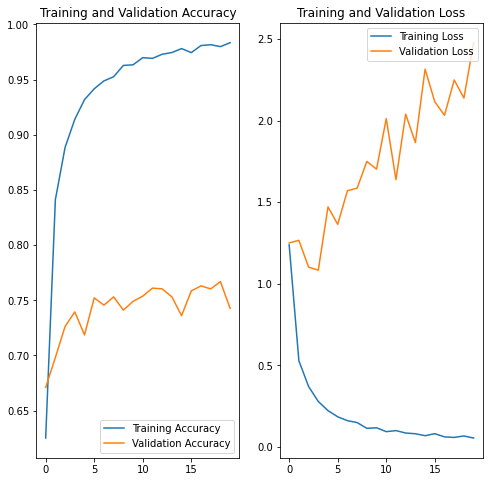

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Cropped images - MobileNet - 77.76%

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size
  )


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size
  )

Found 34799 files belonging to 43 classes.


In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (224, 224) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(43)
prediction_batch = prediction_layer(feature_batch_average)

inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)


base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=valid_ds)

Epoch 1/10
1088/1088 [==============================] - 132s 121ms/step - loss: 2.0504 - accuracy: 0.4407 - val_loss: 1.5362 - val_accuracy: 0.5694
Epoch 2/10
1088/1088 [==============================] - 133s 122ms/step - loss: 1.1289 - accuracy: 0.6887 - val_loss: 1.2146 - val_accuracy: 0.6574
Epoch 3/10
1088/1088 [==============================] - 133s 122ms/step - loss: 0.8662 - accuracy: 0.7628 - val_loss: 1.0691 - val_accuracy: 0.6918
Epoch 4/10
1088/1088 [==============================] - 131s 121ms/step - loss: 0.7241 - accuracy: 0.8028 - val_loss: 0.9857 - val_accuracy: 0.7134
Epoch 5/10
1088/1088 [==============================] - 130s 119ms/step - loss: 0.6301 - accuracy: 0.8293 - val_loss: 0.9254 - val_accuracy: 0.7299
Epoch 6/10
1088/1088 [==============================] - 133s 122ms/step - loss: 0.5651 - accuracy: 0.8470 - val_loss: 0.8917 - val_accuracy: 0.7379
Epoch 7/10
1088/1088 [==============================] - 133s 122ms/step - loss: 0.5161 - accuracy: 0.8588 - val_

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 44s 113ms/step - loss: 0.7710 - accuracy: 0.7776


[0.7709709405899048, 0.7775930166244507]

In [ ]:
# model.save('p21_MobileNet_77.h5')

# hist equalized images - Xception - 73.24%

In [ ]:
import os
import tensorflow as tf

train_dir_hist = os.getcwd()+'/d1/hist/train'
test_dir_hist = os.getcwd()+'/d1/hist/test'
valid_dir_hist = os.getcwd()+'/d1/hist/valid'
img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

In [ ]:
from tensorflow import keras

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
# x = inputs  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(inputs)
norm_layer.set_weights([mean, var])

base_model.trainable = False
for layer in base_model.layers[:-10]:
    layer.trainable = True

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(43)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
normalization_2 (Normalizati (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 43)                88107     
Total params: 20,949,594
Trainable params: 88,107
Non-trainable params: 20,861,487
_____________________________________

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


epochs = 10
history = model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=valid_ds, 
    batch_size=32,)

Epoch 1/10
1088/1088 [==============================] - 131s 121ms/step - loss: 0.9354 - accuracy: 0.7178 - val_loss: 0.9473 - val_accuracy: 0.6984
Epoch 2/10
1088/1088 [==============================] - 129s 119ms/step - loss: 0.5041 - accuracy: 0.8362 - val_loss: 0.8704 - val_accuracy: 0.7293
Epoch 3/10
1088/1088 [==============================] - 130s 119ms/step - loss: 0.4067 - accuracy: 0.8671 - val_loss: 0.8875 - val_accuracy: 0.7338
Epoch 4/10
1088/1088 [==============================] - 126s 116ms/step - loss: 0.3551 - accuracy: 0.8825 - val_loss: 0.8831 - val_accuracy: 0.7399
Epoch 5/10
1088/1088 [==============================] - 127s 117ms/step - loss: 0.3210 - accuracy: 0.8932 - val_loss: 0.9027 - val_accuracy: 0.7383
Epoch 6/10
1088/1088 [==============================] - 128s 118ms/step - loss: 0.2952 - accuracy: 0.9015 - val_loss: 0.9310 - val_accuracy: 0.7379
Epoch 7/10
1088/1088 [==============================] - 125s 114ms/step - loss: 0.2789 - accuracy: 0.9064 - val_

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 40s 101ms/step - loss: 1.0492 - accuracy: 0.7324


[1.0491570234298706, 0.7323831915855408]

In [ ]:
# model.save('p21_Xception_hist_73,24.h5')

# hist equalized input - CNN1 - 86.17%


In [ ]:
import os
import tensorflow as tf

train_dir_hist = os.getcwd()+'/d1/hist/train'
test_dir_hist = os.getcwd()+'/d1/hist/test'
valid_dir_hist = os.getcwd()+'/d1/hist/valid'
img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

In [ ]:
from tensorflow.keras import layers, Sequential

num_classes = 43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
1088/1088 [==============================] - 88s 81ms/step - loss: 1.1731 - accuracy: 0.6799 - val_loss: 0.8031 - val_accuracy: 0.7757
Epoch 2/20
1088/1088 [==============================] - 88s 81ms/step - loss: 0.3821 - accuracy: 0.8875 - val_loss: 0.7885 - val_accuracy: 0.7986
Epoch 3/20
1088/1088 [==============================] - 87s 80ms/step - loss: 0.2128 - accuracy: 0.9346 - val_loss: 0.8724 - val_accuracy: 0.7800
Epoch 4/20
1088/1088 [==============================] - 86s 79ms/step - loss: 0.1451 - accuracy: 0.9535 - val_loss: 0.8296 - val_accuracy: 0.8372
Epoch 5/20
1088/1088 [==============================] - 83s 76ms/step - loss: 0.1120 - accuracy: 0.9637 - val_loss: 0.8451 - val_accuracy: 0.8265
Epoch 6/20
1088/1088 [==============================] - 82s 76ms/step - loss: 0.0823 - accuracy: 0.9725 - val_loss: 0.8201 - val_accuracy: 0.8578
Epoch 7/20
1088/1088 [==============================] - 81s 74ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.7640 -

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 23s 57ms/step - loss: 1.1065 - accuracy: 0.8617


[1.1064809560775757, 0.8616785407066345]

In [ ]:
# model.save('p21_hist_86,17.h5')

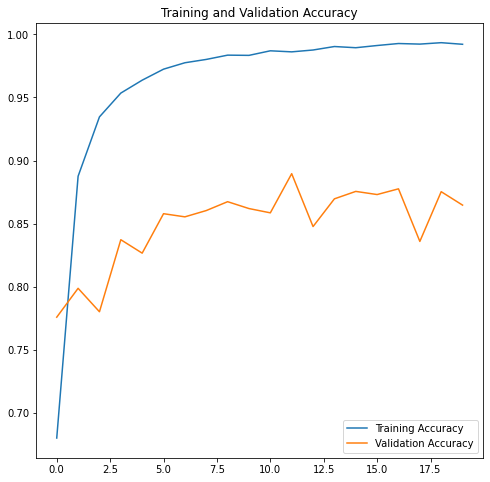

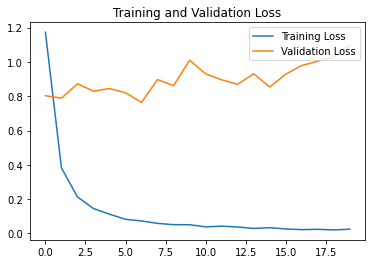

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# hist equalized images - CNN2 - 92.22%
ggergg

In [ ]:
import os
import tensorflow as tf

train_dir_hist = os.getcwd()+'/d1/hist/train'
test_dir_hist = os.getcwd()+'/d1/hist/test'
valid_dir_hist = os.getcwd()+'/d1/hist/valid'
img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

In [ ]:
from tensorflow.keras import layers, Sequential

num_classes = 43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
1088/1088 [==============================] - 88s 81ms/step - loss: 1.0363 - accuracy: 0.7157 - val_loss: 0.6459 - val_accuracy: 0.8338
Epoch 2/20
1088/1088 [==============================] - 86s 79ms/step - loss: 0.2454 - accuracy: 0.9279 - val_loss: 0.5265 - val_accuracy: 0.8800
Epoch 3/20
1088/1088 [==============================] - 84s 77ms/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.5439 - val_accuracy: 0.8977
Epoch 4/20
1088/1088 [==============================] - 84s 77ms/step - loss: 0.0827 - accuracy: 0.9739 - val_loss: 0.5607 - val_accuracy: 0.8961
Epoch 5/20
1088/1088 [==============================] - 83s 76ms/step - loss: 0.0672 - accuracy: 0.9779 - val_loss: 0.5873 - val_accuracy: 0.9045
Epoch 6/20
1088/1088 [==============================] - 84s 78ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.6345 - val_accuracy: 0.9150
Epoch 7/20
1088/1088 [==============================] - 83s 77ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.6501 -

In [ ]:
model.evaluate(test_ds)

395/395 [==============================] - 24s 61ms/step - loss: 0.5626 - accuracy: 0.9222


[0.5626212954521179, 0.9221694469451904]

In [ ]:
# model.save('p21_hist_2_92,22.h5')

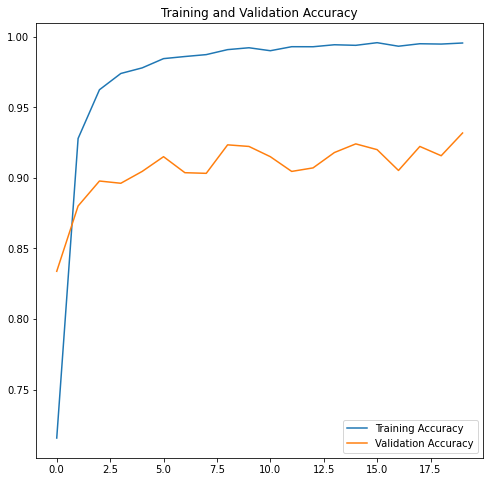

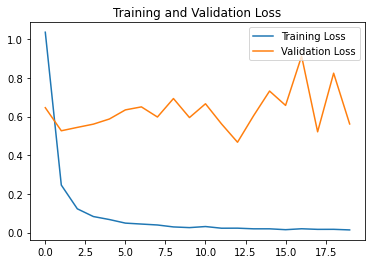

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# hist equalized images - CNN3 - 95.38%


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir_hist = os.getcwd()+'/d1/hist/train'
test_dir_hist = os.getcwd()+'/d1/hist/test'
valid_dir_hist = os.getcwd()+'/d1/hist/valid'
img_height, img_width = 64, 64
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_hist,
  seed=123,
  image_size=(img_width, img_height),
  batch_size=batch_size
  )

Found 34799 files belonging to 43 classes.
Found 4410 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.


In [4]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers.experimental import preprocessing

num_classes = 43

model = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  # layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        9280      
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

In [90]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/15
1088/1088 [==============================] - 128s 118ms/step - loss: 4.1151 - accuracy: 0.6015 - val_loss: 0.6297 - val_accuracy: 0.8245
Epoch 2/15
1088/1088 [==============================] - 125s 115ms/step - loss: 0.2802 - accuracy: 0.9150 - val_loss: 0.4771 - val_accuracy: 0.8964
Epoch 3/15
1088/1088 [==============================] - 126s 116ms/step - loss: 0.1442 - accuracy: 0.9580 - val_loss: 0.3319 - val_accuracy: 0.9213
Epoch 4/15
1088/1088 [==============================] - 121s 111ms/step - loss: 0.0945 - accuracy: 0.9724 - val_loss: 0.3154 - val_accuracy: 0.9415
Epoch 5/15
1088/1088 [==============================] - 120s 110ms/step - loss: 0.0821 - accuracy: 0.9773 - val_loss: 0.3794 - val_accuracy: 0.9252
Epoch 6/15
1088/1088 [==============================] - 120s 110ms/step - loss: 0.0811 - accuracy: 0.9787 - val_loss: 0.4099 - val_accuracy: 0.9170
Epoch 7/15
1088/1088 [==============================] - 121s 111ms/step - loss: 0.0688 - accuracy: 0.9821 - val_

In [93]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/5
1088/1088 [==============================] - 75s 69ms/step - loss: 0.0369 - accuracy: 0.9921 - val_loss: 0.5292 - val_accuracy: 0.9583
Epoch 2/5
1088/1088 [==============================] - 80s 73ms/step - loss: 0.0373 - accuracy: 0.9921 - val_loss: 0.2697 - val_accuracy: 0.9501
Epoch 3/5
1088/1088 [==============================] - 83s 76ms/step - loss: 0.0356 - accuracy: 0.9921 - val_loss: 0.1203 - val_accuracy: 0.9739
Epoch 4/5
1088/1088 [==============================] - 84s 78ms/step - loss: 0.0329 - accuracy: 0.9932 - val_loss: 0.1612 - val_accuracy: 0.9692
Epoch 5/5
1088/1088 [==============================] - 83s 76ms/step - loss: 0.0217 - accuracy: 0.9953 - val_loss: 0.2061 - val_accuracy: 0.9712


In [99]:
epochs=5
hist = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/5
1088/1088 [==============================] - 74s 68ms/step - loss: 0.0375 - accuracy: 0.9924 - val_loss: 0.1115 - val_accuracy: 0.9741
Epoch 2/5
1088/1088 [==============================] - 78s 71ms/step - loss: 0.0250 - accuracy: 0.9955 - val_loss: 0.2547 - val_accuracy: 0.9744
Epoch 3/5
1088/1088 [==============================] - 93s 86ms/step - loss: 0.0366 - accuracy: 0.9933 - val_loss: 0.3583 - val_accuracy: 0.9540
Epoch 4/5
1088/1088 [==============================] - 88s 81ms/step - loss: 0.0212 - accuracy: 0.9957 - val_loss: 0.2190 - val_accuracy: 0.9673
Epoch 5/5
1088/1088 [==============================] - 90s 83ms/step - loss: 0.0340 - accuracy: 0.9933 - val_loss: 0.1468 - val_accuracy: 0.9762


In [100]:
model.evaluate(test_ds)

395/395 [==============================] - 13s 33ms/step - loss: 0.2690 - accuracy: 0.9628


[0.269033819437027, 0.9627870321273804]

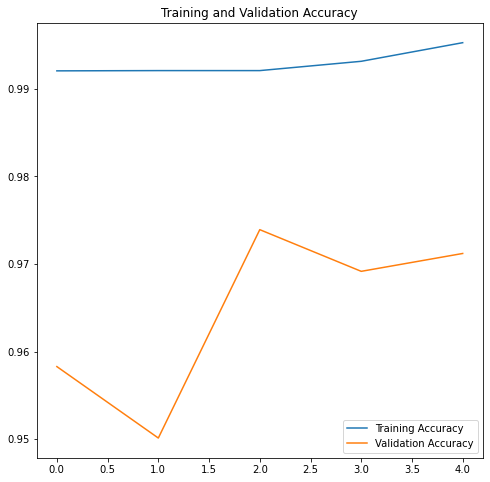

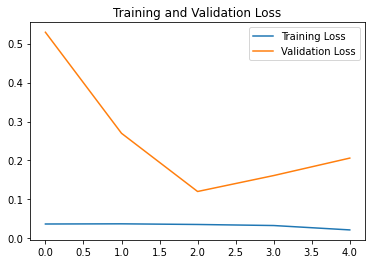

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [119]:
import tensorflow as tf
# model.save('p21_hist_2_95,38.h5')
model = tf.keras.models.load_model('models/p21_hist_2_95,38.h5')
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model.save_weights('p21_hist_2_95,38_wights.h5')
model.load_weights('models/p21_hist_2_95,38_wights.h5')
# model.evaluate(test_ds)

In [120]:
# should be added for class prediction
model.add(tf.keras.layers.Dense(43 , activation='softmax'))

In [ ]:
# plotting filters applied in each neuron

(3, 3, 3, 16)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

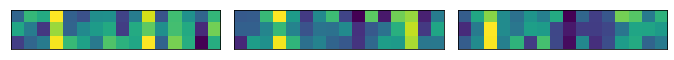

In [45]:
def plot_filters(layer, x, y):
    import matplotlib.pyplot as plt
    import numpy as np

    filters = layer.weights[0].numpy()
    print(layer.weights[0].numpy().shape)
    fig = plt.figure(figsize=(25, 25))
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j][0])
        ax.set_xticks(np.array([]))
        ax.set_yticks(np.array([]))
    plt.tight_layout()
    return plt

plot_filters(model.layers[0], 8, 4)

In [ ]:
# plotting each layers output, to do so i started with a model consisted of an input layer and in each loop added a layer from the trained layer and plotted the output layer.

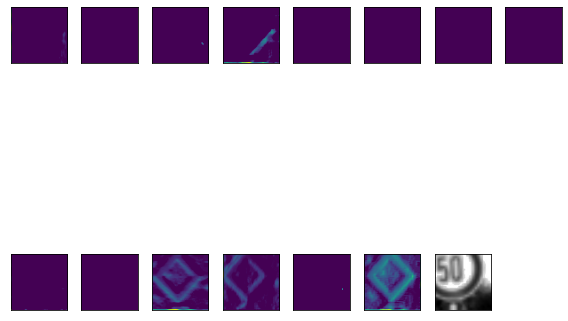

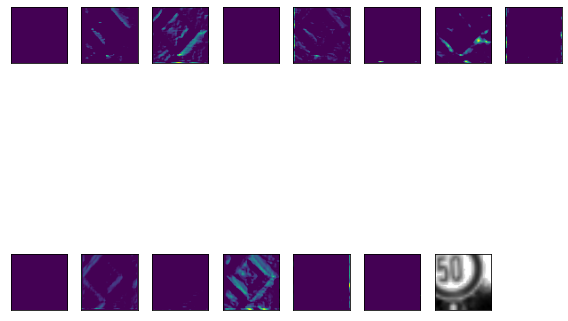

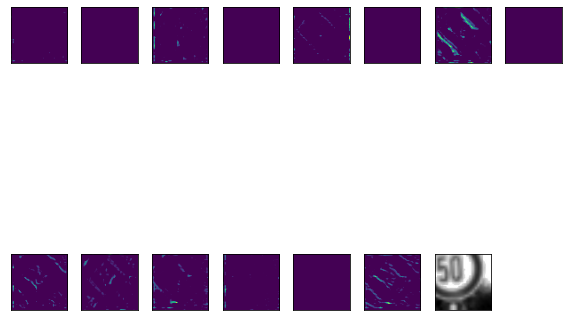

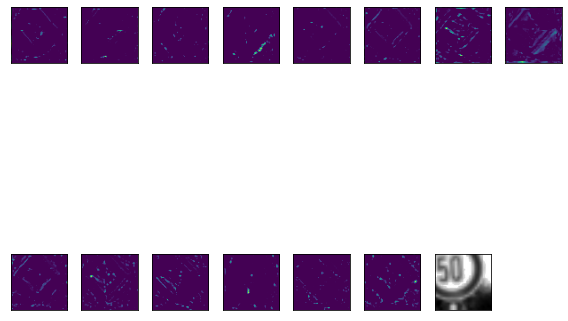

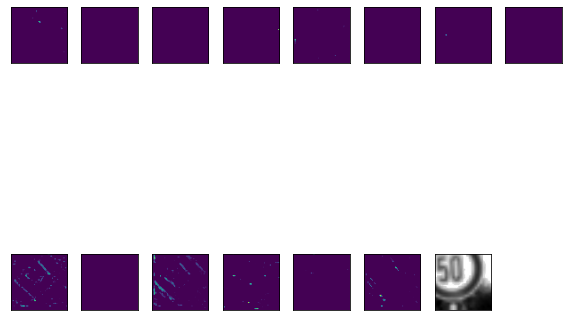

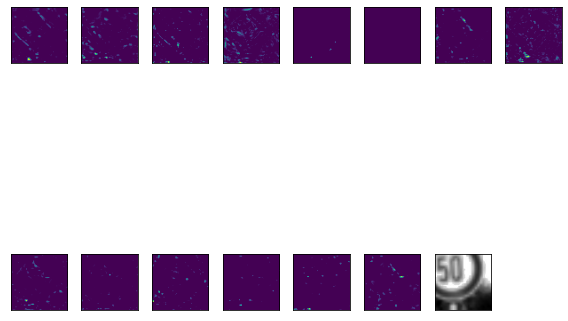

In [85]:
from tensorflow import keras
from tensorflow.keras import Model
import matplotlib.pyplot as plt
inputs = keras.Input(shape=(64, 64, 3), name="input")
x = inputs
for data, _ in train_ds.take(7):
    trainX = data
    break
for n_layer in range(0,12,2):
    x = model.layers[n_layer](x)
    model_layer = Model(inputs=inputs, outputs=x)
    # model_layer = Model(inputs=x, outputs=model.layers[n_layer].output)
    feature_maps = model_layer.predict(trainX[31].numpy().reshape(1, 64, 64, 3))
    n_row = 2
    n_col = 8
    plt.figure(figsize=(8,8))
    ix = 1
    for _ in range(n_row):
        for _ in range(n_col-1):
            ax = plt.subplot(n_row, n_col, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1])
            ix += 1
    ax = plt.subplot(n_row, n_col, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(np.interp(trainX[0].numpy(), (trainX[0].numpy().min(), trainX[0].numpy().max()), (0, 1)))
    plt.tight_layout()
    plt.show()

ClassId                        2
SignName    Speed limit (50km/h)
Name: 2, dtype: object

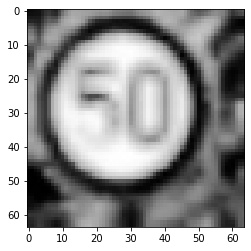

In [175]:
# data = iter(test_ds).next()
predict = model.predict(data[0])
img_data = data[0][0].numpy()
img_data = np.interp(img_data, (img_data.min(), img_data.max()), (0, 1))
plt.imshow(img_data)
if data[1].numpy()[0]==predict[0].argmax(): print('True')
labels.iloc[predict[0].argmax()]

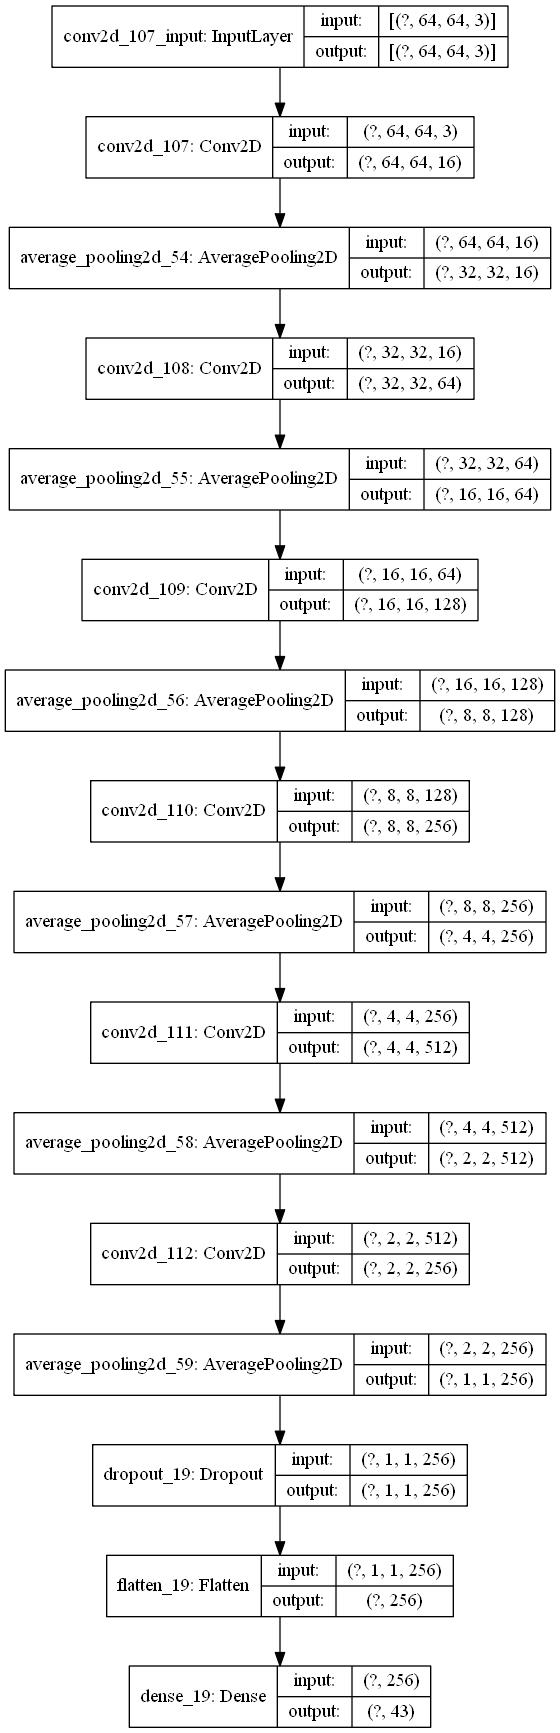

In [9]:
tf.keras.utils.plot_model(model, 'cnn.jpg', show_layer_names=True, show_shapes=True)